Task 2: 
- Identify the city with the highest number of restaurants in the dataset.
- Calculate the average rating for restaurants in each city.
- Determine the city with the highest average rating.

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
df = pd.read_csv('/Users/tilakpatel/Personel/Cognifyz intern/code/Data/Dataset.csv', encoding='utf-8')
df = df.dropna(subset=['Cuisines'])

In [2]:
cities_with_most_restaurants = df['City'].value_counts().head()
cities_with_most_restaurants = pd.DataFrame(cities_with_most_restaurants).reset_index()

In [3]:
df_city = df.copy()

In [4]:
cities_with_highest_rating_resturants = df_city.groupby('City')['Aggregate rating'].mean().sort_values(ascending=False).head(10)
cities_with_highest_rating_resturants = pd.DataFrame(cities_with_highest_rating_resturants).reset_index()

Cities with Most number of Restaurants

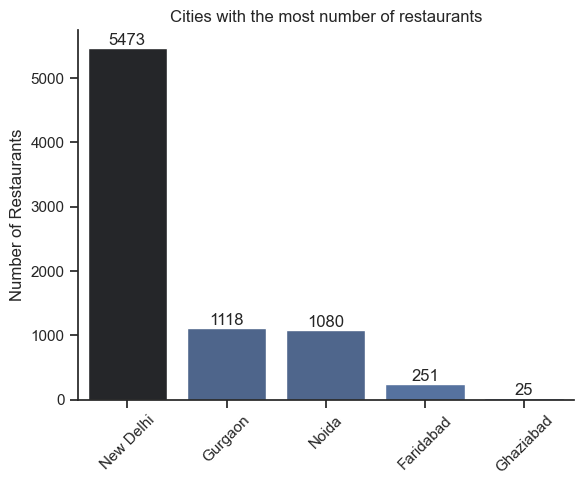

In [5]:
sns.set_theme(style='ticks')
sns.barplot(data=cities_with_most_restaurants, x='City', y='count', hue='count', palette='dark:b_r', legend=False)
plt.xticks(rotation=45)
plt.title('Cities with the most number of restaurants')
plt.ylabel('Number of Restaurants')
plt.xlabel('')
for value in cities_with_most_restaurants['count']:
    plt.text(cities_with_most_restaurants['count'].values.tolist().index(value), value, str(value), ha='center', va='bottom')
sns.despine()
plt.show()

Cities with Highest Average Ratings

In [6]:
cities_with_highest_rating_resturants['Aggregate rating'] = cities_with_highest_rating_resturants['Aggregate rating'].round(2)

In [13]:
cities_with_highest_rating_resturants

,City,Aggregate rating
0,Inner City,4.90
1,Quezon City,4.80
2,Makati City,4.65
3,Pasig City,4.63
4,Mandaluyong City,4.62
5,Beechworth,4.60
6,London,4.54
7,Taguig City,4.53
8,Tagaytay City,4.50
9,Secunderabad,4.50


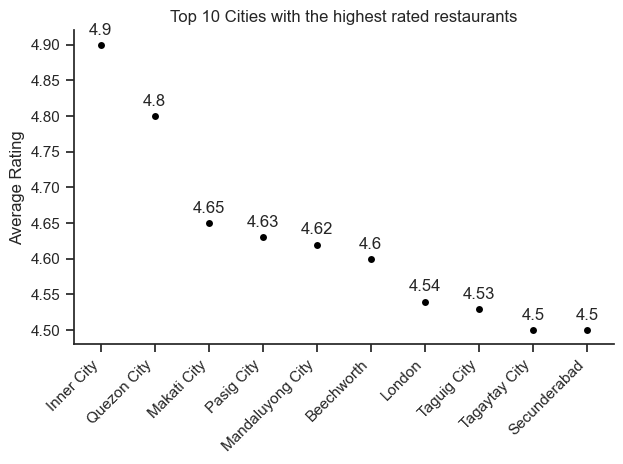

In [7]:
sns.swarmplot(data=cities_with_highest_rating_resturants, x='City', y='Aggregate rating', color='black')
plt.xticks(rotation=45, ha='right')
plt.title('Top 10 Cities with the highest rated restaurants')
plt.ylabel('Average Rating')
for index, value in enumerate(cities_with_highest_rating_resturants['Aggregate rating']):
    plt.text(index, value+0.01, str(value), ha='center', va='bottom')
plt.xlabel('')
sns.despine()
plt.tight_layout()
plt.show()

From the graph above the City with the Highest Average rating is Inner City

Average rating for the top 10 cities with the most number of restaurants.

In [25]:
df1 = df.groupby('City')['Aggregate rating'].agg(['size', 'mean']).sort_values(by='size', ascending=False).head(10)
df1.sort_values(by='mean', ascending=False, inplace=True)
df1['mean'] = df1['mean'].round(2)
df1

,size,mean
City,,
Lucknow,21,4.20
Guwahati,21,4.19
Ahmedabad,21,4.16
Bhubaneshwar,21,3.98
Amritsar,21,3.69
Ghaziabad,25,2.85
Gurgaon,1118,2.65
New Delhi,5473,2.44
Noida,1080,2.04


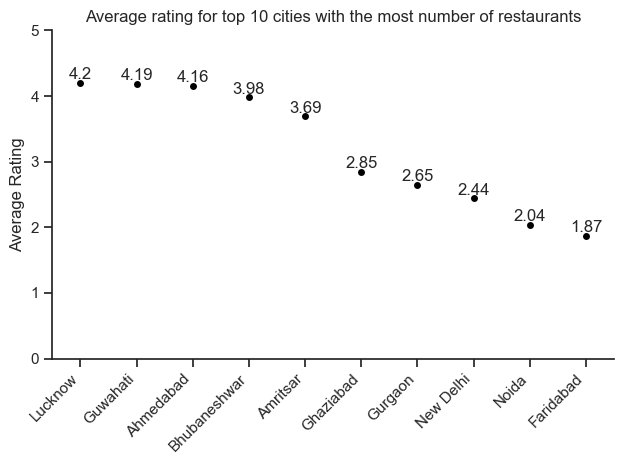

In [29]:
sns.swarmplot(data=df1, x='City', y='mean', color='black')
plt.xticks(rotation=45, ha='right')
plt.title('Average rating for top 10 cities with the most number of restaurants')
plt.ylabel('Average Rating')
plt.ylim(0, 5.0)
for index, value in enumerate(df1['mean']):
    plt.text(index, value+0.01, str(value), ha='center', va='bottom')
plt.xlabel('')
sns.despine()
plt.tight_layout()
plt.show()